In [3]:
import numpy as np

import matplotlib.pyplot as plt

import tqdm

In [4]:
import os

os.chdir("..")

In [5]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader("main", "src/main.py").load_module()

eq = SourceFileLoader("eq", "src/numerical_equilibria_n_bit_vs_n_bit.py").load_module()

from main import invariant_distribution, invariant_distribution_analytically

def match_payoff(player, coplayer, Sx):
    M = eq.calculate_M_memory_two(player, coplayer)
    ss = invariant_distribution(M)

    return ss @ Sx

In [22]:
p = 1 / 2

players = [[1, p, 1, p, 1, p, 1, p, 1, p, 1, p, 1, p, 1, p],
           [1, 1, 1, 1, p, p, p, p, 1, 1, 1, 1, p, p, p, p]]

In [23]:
len(players[0]), len(players[1])

(16, 16)

In [78]:
b = 2
c = 1

Sx = eq.payoffs_donation(b, c, dim=4)

In [79]:
Sx

array([ 1, -1,  2,  0,  1, -1,  2,  0,  1, -1,  2,  0,  1, -1,  2,  0])

In [91]:
results = []

for coplayer in tqdm.tqdm_notebook(players):
    
    payoffs = []
    
    for i in tqdm.tqdm_notebook(range(10 **3)):

        strategy = np.random.random((1, 16)).round(5)[0]

        sy = match_payoff(strategy, coplayer, Sx)
        
        payoffs.append(sy)
        
    results.append(payoffs)
    

<ipython-input-91-df71e97c4da1>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for coplayer in tqdm.tqdm_notebook(players):


<ipython-input-91-df71e97c4da1>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10 **3)):


In [92]:
match_payoff([0 for _ in range(16)], coplayer, Sx)

1.0

In [93]:
b, c

(2, 1)

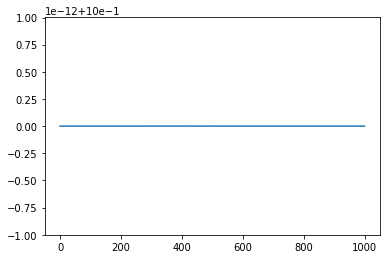

In [94]:
plt.plot(results[0]);

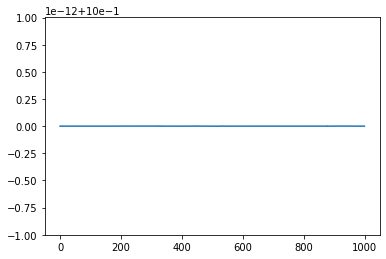

In [95]:
plt.plot(results[1]);

In [24]:
import sympy as sym

In [25]:
q1, q2, q3, q4 = sym.symbols("q_1, q_2, q_3, q_4")

p = sym.symbols("p")

In [26]:
delayed = [1, 1, 1, 1, 0, p, 0, p, 1, 1, 1, 1, 0, p, 0, p]

In [27]:
M = eq.calculate_M_memory_two([q1, q2, q1, q2, q3, q4, q3, q4, q1, q2, q1, q2, q3, q4, q3, q4,],
                          delayed, analytical=True)

In [28]:
M

Matrix([
[q_1,   0, 1 - q_1,       0,   0,   0,       0,       0,     0,           0,           0,                 0,     0,           0,           0,                 0],
[  0,   0,       0,       0, q_2,   0, 1 - q_2,       0,     0,           0,           0,                 0,     0,           0,           0,                 0],
[  0,   0,       0,       0,   0,   0,       0,       0,   q_1,           0,     1 - q_1,                 0,     0,           0,           0,                 0],
[  0,   0,       0,       0,   0,   0,       0,       0,     0,           0,           0,                 0,   q_2,           0,     1 - q_2,                 0],
[q_3,   0, 1 - q_3,       0,   0,   0,       0,       0,     0,           0,           0,                 0,     0,           0,           0,                 0],
[  0,   0,       0,       0, q_4,   0, 1 - q_4,       0,     0,           0,           0,                 0,     0,           0,           0,                 0],
[  0,   0,       0,

In [30]:
import itertools

deterministic_strategies = itertools.product([0, 1], repeat=2 ** (2 * 2))

In [31]:
deterministic_strategies = list(deterministic_strategies)

In [32]:
len(deterministic_strategies)

65536

In [33]:
M = eq.calculate_M_memory_two(deterministic_strategies[0], delayed, analytical=True)

In [35]:
ss = invariant_distribution_analytically(M)

In [36]:
ss

Matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, p**2, p*(1 - p), 0, 0, p*(1 - p), p**2 - 2*p + 1]])

In [ ]:
deterministic_strategies = list(
    itertools.product([0, 1], repeat=2 ** (2 * 4))
)

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("../data/big_data/dimensions_2_iter_9792_number_of_trials_1000.csv")

In [13]:
df['N0'].nunique()

65535

In [ ]:
deterministic_strategies

In [113]:
d7 = [1, 1, 1, 1, 0, p, 0, p, 1, 1, 1, 1, 0, p, 0, p]

In [ ]:
b, c = sym.symbols("b, c")

In [ ]:
ss @ np.array

### Corner strategies

In [14]:
p

NameError: name 'p' is not defined

In [15]:
def from_four_to_sixteen(player):
    return [player[0], player[1], player[0], player[1], player[2], player[3], player[2], player[3],
            player[0], player[1], player[0], player[1], player[2], player[3], player[2], player[3]]

In [16]:
bval, cval = 2, 1

In [17]:
p = 1 - cval / bval

In [18]:
Sx = eq.payoffs_donation(bval, cval, dim=4)

In [19]:
corner_strategies = [[1, 0, 0, 0],
[1, 1, 0, 0],
[1, 0, 1, 0],
[1, 1, p, 0],
[1, p, 1, 0],
[1, 0, 0, p],
[1, 1, 0, p],
[1, 0, 1, p],
[1, 1, p, p],
[1, p, 1, p],]

In [20]:
corner_strategies_as_sixteen = [from_four_to_sixteen(s) for s in corner_strategies]

In [21]:
results_theirs = []

results_mine = []

for coplayer in tqdm.tqdm_notebook(corner_strategies_as_sixteen):
    
    payoffs = []
    payoffsb = []
    
    for i in range(10 **3):

        strategy = np.random.random((1, 16)).round(5)[0]

        sy = match_payoff(strategy, coplayer, Sx)
        
        sx = match_payoff(coplayer, strategy, Sx)
        
        payoffs.append(sy)
        payoffsb.append(sx)
        
    results_theirs.append(payoffs)
    results_mine.append(payoffsb)

<ipython-input-21-892c4e213295>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for coplayer in tqdm.tqdm_notebook(corner_strategies_as_sixteen):


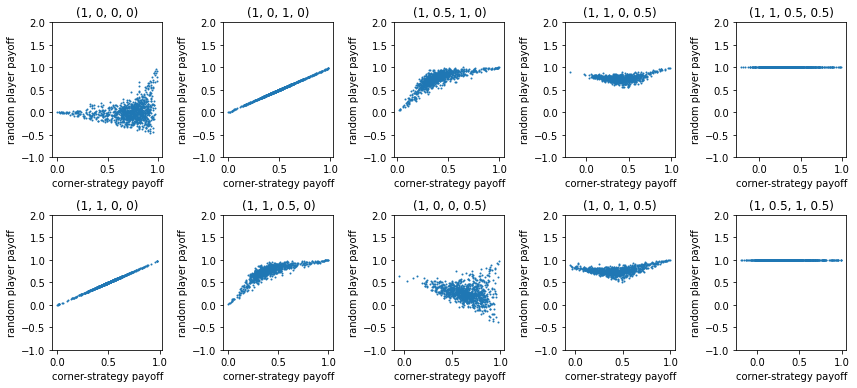

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5.5))

for i, result in enumerate(results_mine):
    
    index = (i % 2, int(i / 2))
    
    ax[index].scatter(result, results_theirs[i], s=1)
    ax[index].set_xlabel("corner-strategy payoff")
    ax[index].set_ylabel("random player payoff")
    
    ax[index].set_title(f"{corner_strategies[i]}".replace("[", "(").replace("]", ")"))
    
    ax[index].set_ylim(-1, 2)
#     ax[index].set_xlim(-1, 2)
    
plt.tight_layout();

# plt.savefig("/Users/glynatsi/Downloads/corner_s_against_random.pdf", bbox_inches='tight')

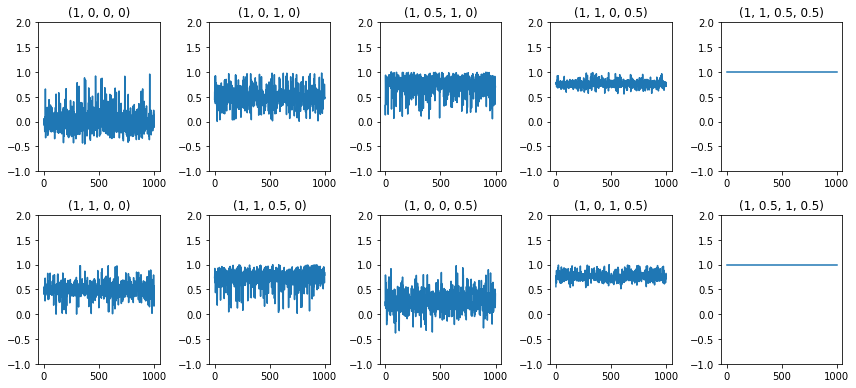

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5.5))

for i, result in enumerate(results_theirs):
    
    index = (i % 2, int(i / 2))
    
    ax[index].plot(result)
    
    ax[index].set_title(f"{corner_strategies[i]}".replace("[", "(").replace("]", ")"))
    
    ax[index].set_ylim(-1, 2)
    
plt.tight_layout();

# plt.savefig("/Users/glynatsi/Downloads/corner_s.pdf", bbox_inches='tight')

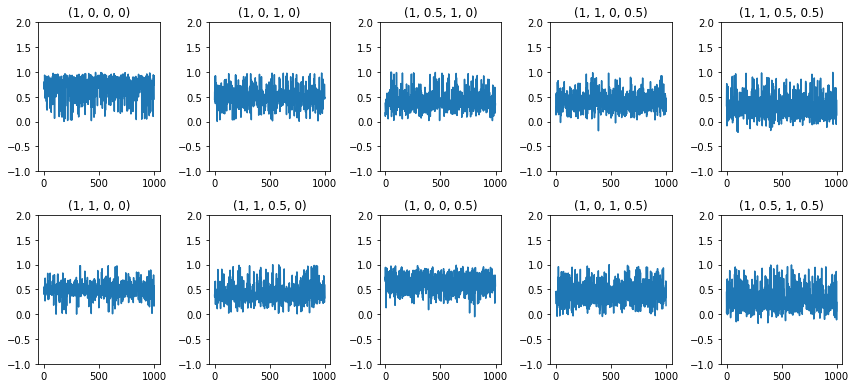

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5.5))

for i, result in enumerate(results_mine):
    
    index = (i % 2, int(i / 2))
    
    ax[index].plot(result)
    
    ax[index].set_title(f"{corner_strategies[i]}".replace("[", "(").replace("]", ")"))
    
    ax[index].set_ylim(-1, 2)
    
plt.tight_layout();

# plt.savefig("/Users/glynatsi/Downloads/corner_s.pdf", bbox_inches='tight')

### Proof

In [6]:
import sympy as sym

p1, p2, p3, p4 = sym.symbols("p1, p2, p3, p4")

q1, q2 = sym.symbols("q1, q2")

In [8]:
M = main.calculate_M([q1, q2, q1, q2], [p1, p2, p3, p4], analytical=True)

In [10]:
ss = invariant_distribution_analytically(M)

In [13]:
ss[0].simplify()

(p2*p3*q1*q2 - p2*p3*q2**2 - p2*p4*q1*q2 + p2*p4*q1 + p2*p4*q2**2 - p2*p4*q2 + p3*q2**2 - p4*q2**2 + p4*q2)/(p1*p3*q1**2 - 2*p1*p3*q1*q2 + p1*p3*q2**2 - p1*p4*q1**2 + 2*p1*p4*q1*q2 - p1*p4*q1 - p1*p4*q2**2 + p1*p4*q2 - p1*q1 - p2*p3*q1**2 + 2*p2*p3*q1*q2 + p2*p3*q1 - p2*p3*q2**2 - p2*p3*q2 + p2*p4*q1**2 - 2*p2*p4*q1*q2 + p2*p4*q2**2 + p2*q1 - p2 - p3*q1 + 2*p3*q2 + p4*q1 - 2*p4*q2 + p4 + 1)

### Linear Decreasing Idea

In [25]:
import numpy as np

In [34]:
x = np.arange(0, 1, 0.03)

y = np.arange(0, 1, 0.03)

xx1, yy1 = np.meshgrid(x, y)

z = 1  - ((5 - 3) / 3) * xx1

z2 = 1 - ((5 - 3) / 2) * yy1

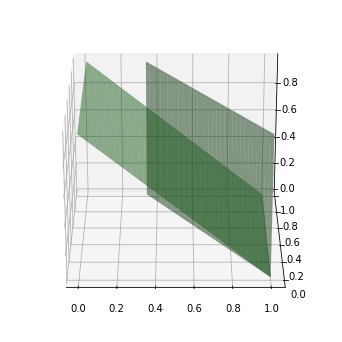

In [41]:
fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(131, projection='3d');

ax.plot_surface(z, xx1, yy1, alpha=0.5, color="tab:green");

ax.plot_surface(z2, xx1, yy1, alpha=0.5, color="tab:green");

ax.view_init(25, -90)

In [42]:
data = np.zeros((100, 100))

for i, y in enumerate(np.linspace(0, 1, 100)):
    for j, x in enumerate(np.linspace(0, 1, 100)):
        data[i, j] = int(((5 - 3) / 3) * y <= 1 - x)

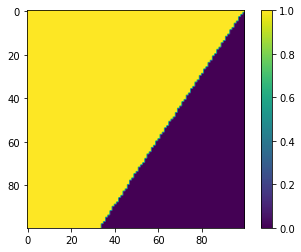

In [45]:
plt.imshow(data)

plt.colorbar();